<a href="https://colab.research.google.com/github/bionic-brahma/AlgorithmsInPRogressFromScratch/blob/master/LogisticRegressionFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [91]:
class LR:
  def __init__(self, iteration=1000, learning_rate=0.001):
    self.iter= iteration
    self.lr= learning_rate
    self.weights=None
    self.bias= None

  def sigmoid(self,Z):
    return 1/(1+np.exp(-Z))

  def fit(self,X,Y):
    Y= np.where(Y<=0,0,1)
    n_rec, n_feat= X.shape
    print("records= ", n_rec, "  features= ", n_feat)
    self.weights= np.zeros(n_feat)
    self.bias=0.0
    
    for it in range(self.iter):
      model= self.sigmoid(np.dot(X, self.weights)+self.bias)
      print(model)
      log_loss= (1/n_rec)*np.sum(-(np.dot(np.transpose(Y),np.log(model))+np.dot(np.transpose((1-Y)),np.log(1-model))))#-[ylog(predicted_y)+(1-y)log(1-predicted_y)]
      for idx, x in enumerate(X):
        if Y[idx]<=0:
          self.weights= self.weights- self.lr * model[idx] * x
          self.bias= self.bias - self.lr * model[idx]
        else:
          self.weights= self.weights- self.lr * (model[idx]-1) * x
          self.bias= self.bias - self.lr * (model[idx]-1)

      print("iteration: ",it," Log loss: ", log_loss)
     # print("weights: ", self.weights)

  def predict(self,X):
    return self.sigmoid(np.dot(X, self.weights)+self.bias)




In [92]:
X=np.array([[1,4],[2,5],[1,6],[7,10],[1,1],[2,1],[7,5],[12,7]])
Y=np.array([[1],[1],[1],[1],[0],[0],[0],[0]])
print(Y.shape)
print(X.shape)

(8, 1)
(8, 2)


In [93]:
import matplotlib.pyplot as plt
% matplotlib inline

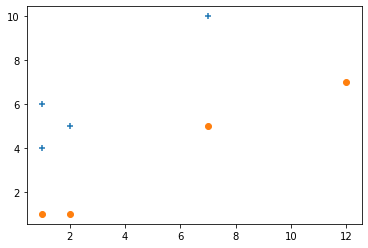

In [94]:
plt.scatter(X[0:4,0],X[0:4,1],marker="+")
plt.scatter(X[4:,0],X[4:,1],marker="o")

In [97]:
model= LR(iteration=10000,learning_rate=0.001)

In [98]:
model.fit(X,Y)

Streaming output truncated to the last 5000 lines.
 1.27012309e-01 1.68017806e-02 1.95546843e-03 3.13678098e-06]
iteration:  8333  Log loss:  0.02365136701423668
[9.88786957e-01 9.88719873e-01 9.99841695e-01 9.88378458e-01
 1.27000588e-01 1.67990590e-02 1.95507682e-03 3.13563233e-06]
iteration:  8334  Log loss:  0.023648852076030735
[9.88787941e-01 9.88720928e-01 9.99841730e-01 9.88379876e-01
 1.26988869e-01 1.67963382e-02 1.95468533e-03 3.13448425e-06]
iteration:  8335  Log loss:  0.023646337671814822
[9.88788925e-01 9.88721982e-01 9.99841764e-01 9.88381293e-01
 1.26977152e-01 1.67936181e-02 1.95429396e-03 3.13333671e-06]
iteration:  8336  Log loss:  0.02364382380141901
[9.88789909e-01 9.88723036e-01 9.99841799e-01 9.88382711e-01
 1.26965437e-01 1.67908988e-02 1.95390272e-03 3.13218973e-06]
iteration:  8337  Log loss:  0.023641310464673583
[9.88790892e-01 9.88724089e-01 9.99841834e-01 9.88384127e-01
 1.26953725e-01 1.67881801e-02 1.95351160e-03 3.13104331e-06]
iteration:  8338  Log lo

In [105]:
model.predict([[10,1],[1,10],[14,13]])

array([2.34113885e-10, 1.00000000e+00, 1.36002910e-02])